# The Race Around The Netherlands - 2019
webscraping the leaderboard of 2019

more detailed description of the code can be found in the 2018 notebook.

In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import regex as re
import datetime

In [19]:
#for scraping java
import selenium
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support.expected_conditions import presence_of_element_located

In [20]:
#CUSTOMIZE URL
url = 'https://ratn2019.legendstracking.com/#'

#set that you want to run the chrome headless (behind the scenes, in the background)
chrome_options = Options()
chrome_options.add_argument("--headless")

#insert absolute path of chrome driver
driver = webdriver.Chrome('C:/Users/jetsa/chromedriver.exe', options = chrome_options)
driver.get(url)

# Find and click the right button, using the tab's id
button = driver.find_element(By.ID, "leaderboard-icon")
button.click()

In [21]:
#From here on you can start using BS4. I will now also see the html=code that became visible by clicking the button.
source = driver.page_source

## WARNING!
This page takes it's time to load to solo-riders table. Wait 30-60 seconds before you close the driver in the next cell.

In [22]:
#close the webdriver
driver.close()

<html>
 <head>
  <meta content="https://www.legendstracking.com/_lib/img/logo-facebook.png" property="og:image"/>
  <meta content="1200" property="og:image:width"/>
  <meta content="630" property="og:image:height"/>
  <meta content="Legends Tracking" property="og:title"/>
  <meta content="https://www.legendstracking.com" property="og:url"/>
  <meta content="Live gps tracking services for your event" property="og:description"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
  <link href="../css/font-awesome.min.css" rel="stylesheet" type="text/css"/>
  <link href="../css/ol.css" rel="stylesheet" type="text/css"/>
  <link href="../css/trackers1.css" rel="stylesheet" type="text/css"/>
  <link href="../css/ol3-sidebar.css" rel="stylesheet" type="text/css"/>
  <link href="../css/ol3-layerswitcher.css" rel="stylesheet" type="text/css"/>
  <link href="../css/flags.css" rel="stylesheet" type="text/css"/>
  <link href="../dev/css/j
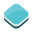

In [23]:
#make the soup
soup = BeautifulSoup(source, 'html')
print(soup.prettify())

In [24]:
#MIGHT NEED CUSTOMIZATION, check if you find the right table when you choose table 2.
#The table should contain information about the timings of the soloriders.
#this only works when put in a different cell.Maybe because you'll have to wait till the previous line is loaded?
table_solo = soup.find_all('table')[2]
table_solo

<table><tbody><tr><td colspan="6"></td><td>Start</td><td>Timing 1</td><td>Timing 2</td><td>Timing 3</td><td>Timing 4</td><td>Timing 5</td><td>Timing 6</td><td>Timing 7</td><td>Timing 8</td><td>Timing 9</td><td>Finish</td></tr><tr><td>1)</td><td style="vertical-align:top">15</td><td style="vertical-align:top;"><div style="min-width:16px;"><img class="flag flag-nl" src="../img/blank.gif"/></div></td><td style="vertical-align:top"><i aria-hidden="true" class="fa fa-mars fa-fw"></i></td><td>Vlaskamp</td><td>Bas</td><td><b>Wed 8:00</b></td><td><span id="leaderboard_17394_1"><b>Wed 12:42</b></span></td><td><span id="leaderboard_17394_2"><b>Wed 22:15</b></span></td><td><span id="leaderboard_17394_3"><b>Thu 8:09</b></span></td><td><span id="leaderboard_17394_4"><b>Thu 11:41</b></span></td><td><span id="leaderboard_17394_5"><b>Thu 22:27</b></span></td><td><span id="leaderboard_17394_6"><b>Fri 14:35</b></span></td><td><span id="leaderboard_17394_7"><b>Fri 18:06</b></span></td><td><span id="leade

In [27]:
#find all the rows from this specific table
rows_solo = table_solo.findChildren('tr')
rows_solo[1]

<tr><td>1)</td><td style="vertical-align:top">15</td><td style="vertical-align:top;"><div style="min-width:16px;"><img class="flag flag-nl" src="../img/blank.gif"/></div></td><td style="vertical-align:top"><i aria-hidden="true" class="fa fa-mars fa-fw"></i></td><td>Vlaskamp</td><td>Bas</td><td><b>Wed 8:00</b></td><td><span id="leaderboard_17394_1"><b>Wed 12:42</b></span></td><td><span id="leaderboard_17394_2"><b>Wed 22:15</b></span></td><td><span id="leaderboard_17394_3"><b>Thu 8:09</b></span></td><td><span id="leaderboard_17394_4"><b>Thu 11:41</b></span></td><td><span id="leaderboard_17394_5"><b>Thu 22:27</b></span></td><td><span id="leaderboard_17394_6"><b>Fri 14:35</b></span></td><td><span id="leaderboard_17394_7"><b>Fri 18:06</b></span></td><td><span id="leaderboard_17394_8"><b>Sat 12:59</b></span></td><td><span id="leaderboard_17394_9"><b>Sat 20:55</b></span></td><td><span id="leaderboard_17394_10"><b>Sun 8:58</b></span></td></tr>

In [28]:
#find all the rows from this specific table
rows_solo = table_solo.findChildren('tr')

#convert each elements into a string to prevent an even more horrible mess
string_rows = []

for i in rows_solo:
    i = str(i)
    string_rows.append(i)
# print(string_rows[7]) #test

#convert the string+rows into a dataframe. Name the column "riders"
solo_riders = pd.DataFrame(string_rows)
solo_riders.columns=["riders"]
solo_riders.head()

#split the strings on </td> (this is removed)
solo_riders = solo_riders["riders"].str.split("</td>", expand = True)
solo_riders.head() #to check which columns you should delete in the next step

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,"<tr><td colspan=""6"">",<td>Start,<td>Timing 1,<td>Timing 2,<td>Timing 3,<td>Timing 4,<td>Timing 5,<td>Timing 6,<td>Timing 7,<td>Timing 8,<td>Timing 9,<td>Finish,</tr>,None,None,None,None,None
1,<tr><td>1),"<td style=""vertical-align:top"">15","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Vlaskamp,<td>Bas,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17394_1""><b>Wed 12:4...","<td><span id=""leaderboard_17394_2""><b>Wed 22:1...","<td><span id=""leaderboard_17394_3""><b>Thu 8:09...","<td><span id=""leaderboard_17394_4""><b>Thu 11:4...","<td><span id=""leaderboard_17394_5""><b>Thu 22:2...","<td><span id=""leaderboard_17394_6""><b>Fri 14:3...","<td><span id=""leaderboard_17394_7""><b>Fri 18:0...","<td><span id=""leaderboard_17394_8""><b>Sat 12:5...","<td><span id=""leaderboard_17394_9""><b>Sat 20:5...","<td><span id=""leaderboard_17394_10""><b>Sun 8:5...",</tr>
2,<tr><td>2),"<td style=""vertical-align:top"">31","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Marsmans,<td>Daan,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17406_1""></span>","<td><span id=""leaderboard_17406_2""><b>Wed 22:3...","<td><span id=""leaderboard_17406_3""><b>Thu 2:16...","<td><span id=""leaderboard_17406_4""><b>Thu 9:06...","<td><span id=""leaderboard_17406_5""><b>Thu 21:1...","<td><span id=""leaderboard_17406_6""><b>Fri 15:1...","<td><span id=""leaderboard_17406_7""><b>Fri 18:5...","<td><span id=""leaderboard_17406_8""><b>Sat 12:1...","<td><span id=""leaderboard_17406_9""><b>Sat 20:1...","<td><span id=""leaderboard_17406_10""><b>Sun 12:...",</tr>
3,<tr><td>3),"<td style=""vertical-align:top"">84","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Casier,<td>Ruben,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17459_1""><b>Wed 15:0...","<td><span id=""leaderboard_17459_2""><b>Thu 16:0...","<td><span id=""leaderboard_17459_3""><b>Thu 20:4...","<td><span id=""leaderboard_17459_4""><b>Fri 14:3...","<td><span id=""leaderboard_17459_5""></span>","<td><span id=""leaderboard_17459_6""><b>Sat 17:0...","<td><span id=""leaderboard_17459_7""><b>Sun 9:24...","<td><span id=""leaderboard_17459_8""></span>","<td><span id=""leaderboard_17459_9""></span>","<td><span id=""leaderboard_17459_10""><b>Sun 14:...",</tr>
4,<tr><td>4),"<td style=""vertical-align:top"">85","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Thomas,<td>Sam,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17460_1""><b>Wed 12:4...","<td><span id=""leaderboard_17460_2""><b>Wed 23:3...","<td><span id=""leaderboard_17460_3""><b>Thu 3:25...","<td><span id=""leaderboard_17460_4""><b>Thu 12:5...","<td><span id=""leaderboard_17460_5""><b>Fri 0:24...","<td><span id=""leaderboard_17460_6""><b>Fri 18:2...","<td><span id=""leaderboard_17460_7""><b>Fri 21:5...","<td><span id=""leaderboard_17460_8""><b>Sat 13:0...","<td><span id=""leaderboard_17460_9""><b>Sat 23:0...","<td><span id=""leaderboard_17460_10""><b>Sun 14:...",</tr>


In [29]:
# MIGHT NEED CUSTOMIZATION - inspect the head and decide which columns to drop. In this (2019) case: colnr 1; 2; 17
solo_riders.drop(solo_riders.columns[[1,2,17]], axis=1, inplace = True)

#rename columns
solo_riders.columns=["Place", "MarsVenus","Lastname", "Firstname", "StartTiming", "Timing1", "Timing2", "Timing3", "Timing4","Timing5", "Timing6", "Timing7", "Timing8", "Timing9", "TimingFinish"]

#check which rows are empty/useless and you should drop in the next cell. You'll need to see all rows (display.max_rows).
# In this case the rows you want to delete are nr 0; 45, 84
pd.set_option('display.max_rows', solo_riders.shape[0]+1)
solo_riders

,Place,MarsVenus,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish
0,"<tr><td colspan=""6"">",<td>Timing 2,<td>Timing 3,<td>Timing 4,<td>Timing 5,<td>Timing 6,<td>Timing 7,<td>Timing 8,<td>Timing 9,<td>Finish,</tr>,None,None,None,None
1,<tr><td>1),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Vlaskamp,<td>Bas,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17394_1""><b>Wed 12:4...","<td><span id=""leaderboard_17394_2""><b>Wed 22:1...","<td><span id=""leaderboard_17394_3""><b>Thu 8:09...","<td><span id=""leaderboard_17394_4""><b>Thu 11:4...","<td><span id=""leaderboard_17394_5""><b>Thu 22:2...","<td><span id=""leaderboard_17394_6""><b>Fri 14:3...","<td><span id=""leaderboard_17394_7""><b>Fri 18:0...","<td><span id=""leaderboard_17394_8""><b>Sat 12:5...","<td><span id=""leaderboard_17394_9""><b>Sat 20:5...","<td><span id=""leaderboard_17394_10""><b>Sun 8:5..."
2,<tr><td>2),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Marsmans,<td>Daan,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17406_1""></span>","<td><span id=""leaderboard_17406_2""><b>Wed 22:3...","<td><span id=""leaderboard_17406_3""><b>Thu 2:16...","<td><span id=""leaderboard_17406_4""><b>Thu 9:06...","<td><span id=""leaderboard_17406_5""><b>Thu 21:1...","<td><span id=""leaderboard_17406_6""><b>Fri 15:1...","<td><span id=""leaderboard_17406_7""><b>Fri 18:5...","<td><span id=""leaderboard_17406_8""><b>Sat 12:1...","<td><span id=""leaderboard_17406_9""><b>Sat 20:1...","<td><span id=""leaderboard_17406_10""><b>Sun 12:..."
3,<tr><td>3),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Casier,<td>Ruben,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17459_1""><b>Wed 15:0...","<td><span id=""leaderboard_17459_2""><b>Thu 16:0...","<td><span id=""leaderboard_17459_3""><b>Thu 20:4...","<td><span id=""leaderboard_17459_4""><b>Fri 14:3...","<td><span id=""leaderboard_17459_5""></span>","<td><span id=""leaderboard_17459_6""><b>Sat 17:0...","<td><span id=""leaderboard_17459_7""><b>Sun 9:24...","<td><span id=""leaderboard_17459_8""></span>","<td><span id=""leaderboard_17459_9""></span>","<td><span id=""leaderboard_17459_10""><b>Sun 14:..."
4,<tr><td>4),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Thomas,<td>Sam,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17460_1""><b>Wed 12:4...","<td><span id=""leaderboard_17460_2""><b>Wed 23:3...","<td><span id=""leaderboard_17460_3""><b>Thu 3:25...","<td><span id=""leaderboard_17460_4""><b>Thu 12:5...","<td><span id=""leaderboard_17460_5""><b>Fri 0:24...","<td><span id=""leaderboard_17460_6""><b>Fri 18:2...","<td><span id=""leaderboard_17460_7""><b>Fri 21:5...","<td><span id=""leaderboard_17460_8""><b>Sat 13:0...","<td><span id=""leaderboard_17460_9""><b>Sat 23:0...","<td><span id=""leaderboard_17460_10""><b>Sun 14:..."
5,<tr><td>5),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Conen,<td>Yves,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17448_1""><b>Wed 13:1...","<td><span id=""leaderboard_17448_2""><b>Thu 4:12...","<td><span id=""leaderboard_17448_3""><b>Thu 7:37...","<td><span id=""leaderboard_17448_4""><b>Thu 12:0...","<td><span id=""leaderboard_17448_5""><b>Fri 4:18...","<td><span id=""leaderboard_17448_6""><b>Fri 16:0...","<td><span id=""leaderboard_17448_7""><b>Fri 20:1...","<td><span id=""leaderboard_17448_8""><b>Sat 16:4...","<td><span id=""leaderboard_17448_9""><b>Sun 6:25...","<td><span id=""leaderboard_17448_10""><b>Sun 17:..."
6,<tr><td>6),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Sharp,<td>Ashley,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17470_1""><b>Wed 13:2...","<td><span id=""leaderboard_17470_2""><b>Thu 4:38...","<td><span id=""leaderboard_17470_3""><b>Thu 7:55...","<td><span id=""leaderboard_17470_4""><b>Thu 12:3...","<td><span id=""leaderboard_17470_5""><b>Fri 1:20...","<td><span id=""leaderboard_17470_6""><b>Fri 17:3...","<td><span id=""leaderboard_17470_7""><b>Fri 21:3...","<td

In [30]:
#CUSTOMIZE: drop useless ROWS
solo_riders = solo_riders.drop([0, 45, 84]).reset_index()
solo_riders.head()

,index,Place,MarsVenus,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish
0,1,<tr><td>1),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Vlaskamp,<td>Bas,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17394_1""><b>Wed 12:4...","<td><span id=""leaderboard_17394_2""><b>Wed 22:1...","<td><span id=""leaderboard_17394_3""><b>Thu 8:09...","<td><span id=""leaderboard_17394_4""><b>Thu 11:4...","<td><span id=""leaderboard_17394_5""><b>Thu 22:2...","<td><span id=""leaderboard_17394_6""><b>Fri 14:3...","<td><span id=""leaderboard_17394_7""><b>Fri 18:0...","<td><span id=""leaderboard_17394_8""><b>Sat 12:5...","<td><span id=""leaderboard_17394_9""><b>Sat 20:5...","<td><span id=""leaderboard_17394_10""><b>Sun 8:5..."
1,2,<tr><td>2),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Marsmans,<td>Daan,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17406_1""></span>","<td><span id=""leaderboard_17406_2""><b>Wed 22:3...","<td><span id=""leaderboard_17406_3""><b>Thu 2:16...","<td><span id=""leaderboard_17406_4""><b>Thu 9:06...","<td><span id=""leaderboard_17406_5""><b>Thu 21:1...","<td><span id=""leaderboard_17406_6""><b>Fri 15:1...","<td><span id=""leaderboard_17406_7""><b>Fri 18:5...","<td><span id=""leaderboard_17406_8""><b>Sat 12:1...","<td><span id=""leaderboard_17406_9""><b>Sat 20:1...","<td><span id=""leaderboard_17406_10""><b>Sun 12:..."
2,3,<tr><td>3),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Casier,<td>Ruben,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17459_1""><b>Wed 15:0...","<td><span id=""leaderboard_17459_2""><b>Thu 16:0...","<td><span id=""leaderboard_17459_3""><b>Thu 20:4...","<td><span id=""leaderboard_17459_4""><b>Fri 14:3...","<td><span id=""leaderboard_17459_5""></span>","<td><span id=""leaderboard_17459_6""><b>Sat 17:0...","<td><span id=""leaderboard_17459_7""><b>Sun 9:24...","<td><span id=""leaderboard_17459_8""></span>","<td><span id=""leaderboard_17459_9""></span>","<td><span id=""leaderboard_17459_10""><b>Sun 14:..."
3,4,<tr><td>4),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Thomas,<td>Sam,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17460_1""><b>Wed 12:4...","<td><span id=""leaderboard_17460_2""><b>Wed 23:3...","<td><span id=""leaderboard_17460_3""><b>Thu 3:25...","<td><span id=""leaderboard_17460_4""><b>Thu 12:5...","<td><span id=""leaderboard_17460_5""><b>Fri 0:24...","<td><span id=""leaderboard_17460_6""><b>Fri 18:2...","<td><span id=""leaderboard_17460_7""><b>Fri 21:5...","<td><span id=""leaderboard_17460_8""><b>Sat 13:0...","<td><span id=""leaderboard_17460_9""><b>Sat 23:0...","<td><span id=""leaderboard_17460_10""><b>Sun 14:..."
4,5,<tr><td>5),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Conen,<td>Yves,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17448_1""><b>Wed 13:1...","<td><span id=""leaderboard_17448_2""><b>Thu 4:12...","<td><span id=""leaderboard_17448_3""><b>Thu 7:37...","<td><span id=""leaderboard_17448_4""><b>Thu 12:0...","<td><span id=""leaderboard_17448_5""><b>Fri 4:18...","<td><span id=""leaderboard_17448_6""><b>Fri 16:0...","<td><span id=""leaderboard_17448_7""><b>Fri 20:1...","<td><span id=""leaderboard_17448_8""><b>Sat 16:4...","<td><span id=""leaderboard_17448_9""><b>Sun 6:25...","<td><span id=""leaderboard_17448_10""><b>Sun 17:..."


In [31]:
#extract the gender
gender = []

for row in solo_riders["MarsVenus"]:
    if 'mars' in row:
        gender.append('male')
    if 'venus' in row:
        gender.append('female')

# Add gender as a column to the solo_riders dataframe and drop the MarsVenus column and the automatically created index-column
solo_riders["Gender"] = gender        
solo_riders = solo_riders.drop(solo_riders[["MarsVenus", "index"]], axis = 1)
solo_riders.head()

,Place,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish,Gender
0,<tr><td>1),<td>Vlaskamp,<td>Bas,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17394_1""><b>Wed 12:4...","<td><span id=""leaderboard_17394_2""><b>Wed 22:1...","<td><span id=""leaderboard_17394_3""><b>Thu 8:09...","<td><span id=""leaderboard_17394_4""><b>Thu 11:4...","<td><span id=""leaderboard_17394_5""><b>Thu 22:2...","<td><span id=""leaderboard_17394_6""><b>Fri 14:3...","<td><span id=""leaderboard_17394_7""><b>Fri 18:0...","<td><span id=""leaderboard_17394_8""><b>Sat 12:5...","<td><span id=""leaderboard_17394_9""><b>Sat 20:5...","<td><span id=""leaderboard_17394_10""><b>Sun 8:5...",male
1,<tr><td>2),<td>Marsmans,<td>Daan,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17406_1""></span>","<td><span id=""leaderboard_17406_2""><b>Wed 22:3...","<td><span id=""leaderboard_17406_3""><b>Thu 2:16...","<td><span id=""leaderboard_17406_4""><b>Thu 9:06...","<td><span id=""leaderboard_17406_5""><b>Thu 21:1...","<td><span id=""leaderboard_17406_6""><b>Fri 15:1...","<td><span id=""leaderboard_17406_7""><b>Fri 18:5...","<td><span id=""leaderboard_17406_8""><b>Sat 12:1...","<td><span id=""leaderboard_17406_9""><b>Sat 20:1...","<td><span id=""leaderboard_17406_10""><b>Sun 12:...",male
2,<tr><td>3),<td>Casier,<td>Ruben,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17459_1""><b>Wed 15:0...","<td><span id=""leaderboard_17459_2""><b>Thu 16:0...","<td><span id=""leaderboard_17459_3""><b>Thu 20:4...","<td><span id=""leaderboard_17459_4""><b>Fri 14:3...","<td><span id=""leaderboard_17459_5""></span>","<td><span id=""leaderboard_17459_6""><b>Sat 17:0...","<td><span id=""leaderboard_17459_7""><b>Sun 9:24...","<td><span id=""leaderboard_17459_8""></span>","<td><span id=""leaderboard_17459_9""></span>","<td><span id=""leaderboard_17459_10""><b>Sun 14:...",male
3,<tr><td>4),<td>Thomas,<td>Sam,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17460_1""><b>Wed 12:4...","<td><span id=""leaderboard_17460_2""><b>Wed 23:3...","<td><span id=""leaderboard_17460_3""><b>Thu 3:25...","<td><span id=""leaderboard_17460_4""><b>Thu 12:5...","<td><span id=""leaderboard_17460_5""><b>Fri 0:24...","<td><span id=""leaderboard_17460_6""><b>Fri 18:2...","<td><span id=""leaderboard_17460_7""><b>Fri 21:5...","<td><span id=""leaderboard_17460_8""><b>Sat 13:0...","<td><span id=""leaderboard_17460_9""><b>Sat 23:0...","<td><span id=""leaderboard_17460_10""><b>Sun 14:...",male
4,<tr><td>5),<td>Conen,<td>Yves,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17448_1""><b>Wed 13:1...","<td><span id=""leaderboard_17448_2""><b>Thu 4:12...","<td><span id=""leaderboard_17448_3""><b>Thu 7:37...","<td><span id=""leaderboard_17448_4""><b>Thu 12:0...","<td><span id=""leaderboard_17448_5""><b>Fri 4:18...","<td><span id=""leaderboard_17448_6""><b>Fri 16:0...","<td><span id=""leaderboard_17448_7""><b>Fri 20:1...","<td><span id=""leaderboard_17448_8""><b>Sat 16:4...","<td><span id=""leaderboard_17448_9""><b>Sun 6:25...","<td><span id=""leaderboard_17448_10""><b>Sun 17:...",male


In [32]:
#CUSTOMIZE append columns with start date&time, and wether it's a solo or duo ride.
StartDate = datetime.datetime(2019, 5, 1, 8)
solo_riders.insert(0, 'Solo or Duo', 'Solo')
solo_riders.insert(0, 'StartDate', StartDate)

solo_riders.head()

,StartDate,Solo or Duo,Place,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish,Gender
0,2019-05-01 08:00:00,Solo,<tr><td>1),<td>Vlaskamp,<td>Bas,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17394_1""><b>Wed 12:4...","<td><span id=""leaderboard_17394_2""><b>Wed 22:1...","<td><span id=""leaderboard_17394_3""><b>Thu 8:09...","<td><span id=""leaderboard_17394_4""><b>Thu 11:4...","<td><span id=""leaderboard_17394_5""><b>Thu 22:2...","<td><span id=""leaderboard_17394_6""><b>Fri 14:3...","<td><span id=""leaderboard_17394_7""><b>Fri 18:0...","<td><span id=""leaderboard_17394_8""><b>Sat 12:5...","<td><span id=""leaderboard_17394_9""><b>Sat 20:5...","<td><span id=""leaderboard_17394_10""><b>Sun 8:5...",male
1,2019-05-01 08:00:00,Solo,<tr><td>2),<td>Marsmans,<td>Daan,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17406_1""></span>","<td><span id=""leaderboard_17406_2""><b>Wed 22:3...","<td><span id=""leaderboard_17406_3""><b>Thu 2:16...","<td><span id=""leaderboard_17406_4""><b>Thu 9:06...","<td><span id=""leaderboard_17406_5""><b>Thu 21:1...","<td><span id=""leaderboard_17406_6""><b>Fri 15:1...","<td><span id=""leaderboard_17406_7""><b>Fri 18:5...","<td><span id=""leaderboard_17406_8""><b>Sat 12:1...","<td><span id=""leaderboard_17406_9""><b>Sat 20:1...","<td><span id=""leaderboard_17406_10""><b>Sun 12:...",male
2,2019-05-01 08:00:00,Solo,<tr><td>3),<td>Casier,<td>Ruben,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17459_1""><b>Wed 15:0...","<td><span id=""leaderboard_17459_2""><b>Thu 16:0...","<td><span id=""leaderboard_17459_3""><b>Thu 20:4...","<td><span id=""leaderboard_17459_4""><b>Fri 14:3...","<td><span id=""leaderboard_17459_5""></span>","<td><span id=""leaderboard_17459_6""><b>Sat 17:0...","<td><span id=""leaderboard_17459_7""><b>Sun 9:24...","<td><span id=""leaderboard_17459_8""></span>","<td><span id=""leaderboard_17459_9""></span>","<td><span id=""leaderboard_17459_10""><b>Sun 14:...",male
3,2019-05-01 08:00:00,Solo,<tr><td>4),<td>Thomas,<td>Sam,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17460_1""><b>Wed 12:4...","<td><span id=""leaderboard_17460_2""><b>Wed 23:3...","<td><span id=""leaderboard_17460_3""><b>Thu 3:25...","<td><span id=""leaderboard_17460_4""><b>Thu 12:5...","<td><span id=""leaderboard_17460_5""><b>Fri 0:24...","<td><span id=""leaderboard_17460_6""><b>Fri 18:2...","<td><span id=""leaderboard_17460_7""><b>Fri 21:5...","<td><span id=""leaderboard_17460_8""><b>Sat 13:0...","<td><span id=""leaderboard_17460_9""><b>Sat 23:0...","<td><span id=""leaderboard_17460_10""><b>Sun 14:...",male
4,2019-05-01 08:00:00,Solo,<tr><td>5),<td>Conen,<td>Yves,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17448_1""><b>Wed 13:1...","<td><span id=""leaderboard_17448_2""><b>Thu 4:12...","<td><span id=""leaderboard_17448_3""><b>Thu 7:37...","<td><span id=""leaderboard_17448_4""><b>Thu 12:0...","<td><span id=""leaderboard_17448_5""><b>Fri 4:18...","<td><span id=""leaderboard_17448_6""><b>Fri 16:0...","<td><span id=""leaderboard_17448_7""><b>Fri 20:1...","<td><span id=""leaderboard_17448_8""><b>Sat 16:4...","<td><span id=""leaderboard_17448_9""><b>Sun 6:25...","<td><span id=""leaderboard_17448_10""><b>Sun 17:...",male


### Prepare the duo-table 2019

In [33]:
#grab the duo table
table_duo = soup.find_all('table')[3]
table_duo

<table><tbody><tr><td colspan="6"></td><td>Start</td><td>Timing 1</td><td>Timing 2</td><td>Timing 3</td><td>Timing 4</td><td>Timing 5</td><td>Timing 6</td><td>Timing 7</td><td>Timing 8</td><td>Timing 9</td><td>Finish</td></tr><tr><td>1)</td><td style="vertical-align:top">26</td><td style="vertical-align:top;"><div style="min-width:16px;"><img class="flag flag-gb" src="../img/blank.gif"/></div></td><td style="vertical-align:top"><i aria-hidden="true" class="fa fa-mars fa-fw"></i></td><td>Robison</td><td>Kevin</td><td><b>Wed 8:00</b></td><td><span id="leaderboard_17478_1"><b>Wed 13:50</b></span></td><td><span id="leaderboard_17478_2"><b>Thu 11:19</b></span></td><td><span id="leaderboard_17478_3"><b>Thu 14:57</b></span></td><td><span id="leaderboard_17478_4"><b>Thu 21:03</b></span></td><td><span id="leaderboard_17478_5"><b>Fri 18:02</b></span></td><td><span id="leaderboard_17478_6"><b>Sat 17:52</b></span></td><td><span id="leaderboard_17478_7"><b>Sun 5:50</b></span></td><td><span id="lead

In [34]:
#grab the rows
rows_duo = table_duo.findChildren('tr')

#convert each elements into a string to prevent an even more horrible mess
string_rows = []

for i in rows_duo:
    i = str(i)
    string_rows.append(i)
print(string_rows[3])

<tr><td>3)</td><td style="vertical-align:top">16</td><td style="vertical-align:top;"><div style="min-width:16px;"><img class="flag flag-gb" src="../img/blank.gif"/></div></td><td style="vertical-align:top"><i aria-hidden="true" class="fa fa-mars fa-fw"></i></td><td>Crawford</td><td>Christopher</td><td><b>Wed 8:00</b></td><td><span id="leaderboard_17475_1"></span></td><td><span id="leaderboard_17475_2"><b>Thu 15:36</b></span></td><td><span id="leaderboard_17475_3"><b>Thu 20:33</b></span></td><td><span id="leaderboard_17475_4"><b>Fri 10:28</b></span></td><td><span id="leaderboard_17475_5"></span></td><td><span id="leaderboard_17475_6"><b>Sat 12:58</b></span></td><td><span id="leaderboard_17475_7"><b>Sat 18:20</b></span></td><td><span id="leaderboard_17475_8"><b>Sun 21:35</b></span></td><td><span id="leaderboard_17475_9"><b>Mon 17:32</b></span></td><td><span id="leaderboard_17475_10"><b>Tue 15:27</b></span></td></tr>


In [35]:
#convert the string+rows into a dataframe. Name the column "riders"
duo_riders = pd.DataFrame(string_rows)
duo_riders.columns=["riders"]
duo_riders.head()

#split the strings on </td>
duo_riders = duo_riders["riders"].str.split("</td>", expand = True)
duo_riders

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,"<tr><td colspan=""6"">",<td>Start,<td>Timing 1,<td>Timing 2,<td>Timing 3,<td>Timing 4,<td>Timing 5,<td>Timing 6,<td>Timing 7,<td>Timing 8,<td>Timing 9,<td>Finish,</tr>,None,None,None,None,None
1,<tr><td>1),"<td style=""vertical-align:top"">26","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Robison,<td>Kevin,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17478_1""><b>Wed 13:5...","<td><span id=""leaderboard_17478_2""><b>Thu 11:1...","<td><span id=""leaderboard_17478_3""><b>Thu 14:5...","<td><span id=""leaderboard_17478_4""><b>Thu 21:0...","<td><span id=""leaderboard_17478_5""><b>Fri 18:0...","<td><span id=""leaderboard_17478_6""><b>Sat 17:5...","<td><span id=""leaderboard_17478_7""><b>Sun 5:50...","<td><span id=""leaderboard_17478_8""><b>Sun 21:5...","<td><span id=""leaderboard_17478_9""><b>Mon 18:4...","<td><span id=""leaderboard_17478_10""><b>Tue 15:...",</tr>
2,<tr><td>2),"<td style=""vertical-align:top"">18","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Robison,<td>Jamie,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17477_1""><b>Wed 13:5...","<td><span id=""leaderboard_17477_2""><b>Thu 11:1...","<td><span id=""leaderboard_17477_3""><b>Thu 14:5...","<td><span id=""leaderboard_17477_4""><b>Thu 21:0...","<td><span id=""leaderboard_17477_5""><b>Fri 18:0...","<td><span id=""leaderboard_17477_6""><b>Sat 17:5...","<td><span id=""leaderboard_17477_7""><b>Sun 5:51...","<td><span id=""leaderboard_17477_8""><b>Sun 22:0...","<td><span id=""leaderboard_17477_9""><b>Mon 18:4...","<td><span id=""leaderboard_17477_10""><b>Tue 15:...",</tr>
3,<tr><td>3),"<td style=""vertical-align:top"">16","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Crawford,<td>Christopher,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17475_1""></span>","<td><span id=""leaderboard_17475_2""><b>Thu 15:3...","<td><span id=""leaderboard_17475_3""><b>Thu 20:3...","<td><span id=""leaderboard_17475_4""><b>Fri 10:2...","<td><span id=""leaderboard_17475_5""></span>","<td><span id=""leaderboard_17475_6""><b>Sat 12:5...","<td><span id=""leaderboard_17475_7""><b>Sat 18:2...","<td><span id=""leaderboard_17475_8""><b>Sun 21:3...","<td><span id=""leaderboard_17475_9""><b>Mon 17:3...","<td><span id=""leaderboard_17475_10""><b>Tue 15:...",</tr>
4,<tr><td>4),"<td style=""vertical-align:top"">133","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Gebing,<td>Pascal,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17494_1""><b>Wed 15:3...","<td><span id=""leaderboard_17494_2""><b>Thu 15:4...","<td><span id=""leaderboard_17494_3""><b>Thu 19:4...","<td><span id=""leaderboard_17494_4""><b>Fri 10:4...","<td><span id=""leaderboard_17494_5""></span>","<td><span id=""leaderboard_17494_6""><b>Sat 12:5...","<td><span id=""leaderboard_17494_7""><b>Sat 18:1...","<td><span id=""leaderboard_17494_8""><b>Sun 21:3...","<td><span id=""leaderboard_17494_9""><b>Mon 17:2...","<td><span id=""leaderboard_17494_10""><b>Tue 15:...",</tr>
5,<tr><td>5),"<td style=""vertical-align:top"">123","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Rutten,<td>René,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17484_1""><b>Wed 14:3...","<td><span id=""leaderboard_17484_2""><b>Thu 13:1...","<td><span id=""leaderboard_17484_3""><b>Thu 16:5...","<td><span id=""leaderboard_17484_4""><b>Fri 8:01...","<td><span id=""leaderboard_17484_5""><b>Fri 20:1...","<td><span id=""leaderboard_17484_6""><b>Sat 19:0...","<td><span id=""leaderboard_17484_7""><b>Sun 9:53...","<td><span id=""leaderboard_17484_8""><b>Mon 9:44...","<td><span id=""leaderboard_17484_9""><b>Tue 7:57...","<td><span id=""leaderboard_17484_10""><b>Tue 20:...",</tr>
6,<tr><td>6),"<td style=""vertica

In [36]:
# CUSTOMIZE drop useless columns: colnr 1; 2; 17
duo_riders = duo_riders.drop(duo_riders.columns[[1,2,17]], axis=1)
duo_riders

#rename columns
duo_riders.columns=["Place", "MarsVenus","Lastname", "Firstname", "StartTiming", "Timing1", "Timing2", "Timing3", "Timing4","Timing5", "Timing6", "Timing7", "Timing8", "Timing9", "TimingFinish"]

#check which rows are empty/useless and you should drop in the next cell. 
duo_riders

,Place,MarsVenus,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish
0,"<tr><td colspan=""6"">",<td>Timing 2,<td>Timing 3,<td>Timing 4,<td>Timing 5,<td>Timing 6,<td>Timing 7,<td>Timing 8,<td>Timing 9,<td>Finish,</tr>,None,None,None,None
1,<tr><td>1),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Robison,<td>Kevin,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17478_1""><b>Wed 13:5...","<td><span id=""leaderboard_17478_2""><b>Thu 11:1...","<td><span id=""leaderboard_17478_3""><b>Thu 14:5...","<td><span id=""leaderboard_17478_4""><b>Thu 21:0...","<td><span id=""leaderboard_17478_5""><b>Fri 18:0...","<td><span id=""leaderboard_17478_6""><b>Sat 17:5...","<td><span id=""leaderboard_17478_7""><b>Sun 5:50...","<td><span id=""leaderboard_17478_8""><b>Sun 21:5...","<td><span id=""leaderboard_17478_9""><b>Mon 18:4...","<td><span id=""leaderboard_17478_10""><b>Tue 15:..."
2,<tr><td>2),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Robison,<td>Jamie,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17477_1""><b>Wed 13:5...","<td><span id=""leaderboard_17477_2""><b>Thu 11:1...","<td><span id=""leaderboard_17477_3""><b>Thu 14:5...","<td><span id=""leaderboard_17477_4""><b>Thu 21:0...","<td><span id=""leaderboard_17477_5""><b>Fri 18:0...","<td><span id=""leaderboard_17477_6""><b>Sat 17:5...","<td><span id=""leaderboard_17477_7""><b>Sun 5:51...","<td><span id=""leaderboard_17477_8""><b>Sun 22:0...","<td><span id=""leaderboard_17477_9""><b>Mon 18:4...","<td><span id=""leaderboard_17477_10""><b>Tue 15:..."
3,<tr><td>3),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Crawford,<td>Christopher,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17475_1""></span>","<td><span id=""leaderboard_17475_2""><b>Thu 15:3...","<td><span id=""leaderboard_17475_3""><b>Thu 20:3...","<td><span id=""leaderboard_17475_4""><b>Fri 10:2...","<td><span id=""leaderboard_17475_5""></span>","<td><span id=""leaderboard_17475_6""><b>Sat 12:5...","<td><span id=""leaderboard_17475_7""><b>Sat 18:2...","<td><span id=""leaderboard_17475_8""><b>Sun 21:3...","<td><span id=""leaderboard_17475_9""><b>Mon 17:3...","<td><span id=""leaderboard_17475_10""><b>Tue 15:..."
4,<tr><td>4),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Gebing,<td>Pascal,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17494_1""><b>Wed 15:3...","<td><span id=""leaderboard_17494_2""><b>Thu 15:4...","<td><span id=""leaderboard_17494_3""><b>Thu 19:4...","<td><span id=""leaderboard_17494_4""><b>Fri 10:4...","<td><span id=""leaderboard_17494_5""></span>","<td><span id=""leaderboard_17494_6""><b>Sat 12:5...","<td><span id=""leaderboard_17494_7""><b>Sat 18:1...","<td><span id=""leaderboard_17494_8""><b>Sun 21:3...","<td><span id=""leaderboard_17494_9""><b>Mon 17:2...","<td><span id=""leaderboard_17494_10""><b>Tue 15:..."
5,<tr><td>5),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Rutten,<td>René,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17484_1""><b>Wed 14:3...","<td><span id=""leaderboard_17484_2""><b>Thu 13:1...","<td><span id=""leaderboard_17484_3""><b>Thu 16:5...","<td><span id=""leaderboard_17484_4""><b>Fri 8:01...","<td><span id=""leaderboard_17484_5""><b>Fri 20:1...","<td><span id=""leaderboard_17484_6""><b>Sat 19:0...","<td><span id=""leaderboard_17484_7""><b>Sun 9:53...","<td><span id=""leaderboard_17484_8""><b>Mon 9:44...","<td><span id=""leaderboard_17484_9""><b>Tue 7:57...","<td><span id=""leaderboard_17484_10""><b>Tue 20:..."
6,<tr><td>6),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Clark,<td>Gawaine,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17414_1""><b>Wed 15:1...","<td><span id=""leaderboard_17414_2""><b>Thu 13:2...","<td><span id=""leaderboard_17414_3""><b>Thu 17:4...","<td><span id=""leaderboard_17414_4""><b>Fri 9:17...","<td><span id=""leaderboard_17414_5""><b>Sat 9:43...","<td><span id=""leaderboard_17414_6""><b>Sun 9:53...","<td><span id=""leaderboard_17414_7""

In [37]:
#CUSTOMIZE: drop useless ROWS
duo_riders = duo_riders.drop([0, 20, 28]).reset_index()
duo_riders.head()

,index,Place,MarsVenus,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish
0,1,<tr><td>1),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Robison,<td>Kevin,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17478_1""><b>Wed 13:5...","<td><span id=""leaderboard_17478_2""><b>Thu 11:1...","<td><span id=""leaderboard_17478_3""><b>Thu 14:5...","<td><span id=""leaderboard_17478_4""><b>Thu 21:0...","<td><span id=""leaderboard_17478_5""><b>Fri 18:0...","<td><span id=""leaderboard_17478_6""><b>Sat 17:5...","<td><span id=""leaderboard_17478_7""><b>Sun 5:50...","<td><span id=""leaderboard_17478_8""><b>Sun 21:5...","<td><span id=""leaderboard_17478_9""><b>Mon 18:4...","<td><span id=""leaderboard_17478_10""><b>Tue 15:..."
1,2,<tr><td>2),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Robison,<td>Jamie,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17477_1""><b>Wed 13:5...","<td><span id=""leaderboard_17477_2""><b>Thu 11:1...","<td><span id=""leaderboard_17477_3""><b>Thu 14:5...","<td><span id=""leaderboard_17477_4""><b>Thu 21:0...","<td><span id=""leaderboard_17477_5""><b>Fri 18:0...","<td><span id=""leaderboard_17477_6""><b>Sat 17:5...","<td><span id=""leaderboard_17477_7""><b>Sun 5:51...","<td><span id=""leaderboard_17477_8""><b>Sun 22:0...","<td><span id=""leaderboard_17477_9""><b>Mon 18:4...","<td><span id=""leaderboard_17477_10""><b>Tue 15:..."
2,3,<tr><td>3),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Crawford,<td>Christopher,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17475_1""></span>","<td><span id=""leaderboard_17475_2""><b>Thu 15:3...","<td><span id=""leaderboard_17475_3""><b>Thu 20:3...","<td><span id=""leaderboard_17475_4""><b>Fri 10:2...","<td><span id=""leaderboard_17475_5""></span>","<td><span id=""leaderboard_17475_6""><b>Sat 12:5...","<td><span id=""leaderboard_17475_7""><b>Sat 18:2...","<td><span id=""leaderboard_17475_8""><b>Sun 21:3...","<td><span id=""leaderboard_17475_9""><b>Mon 17:3...","<td><span id=""leaderboard_17475_10""><b>Tue 15:..."
3,4,<tr><td>4),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Gebing,<td>Pascal,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17494_1""><b>Wed 15:3...","<td><span id=""leaderboard_17494_2""><b>Thu 15:4...","<td><span id=""leaderboard_17494_3""><b>Thu 19:4...","<td><span id=""leaderboard_17494_4""><b>Fri 10:4...","<td><span id=""leaderboard_17494_5""></span>","<td><span id=""leaderboard_17494_6""><b>Sat 12:5...","<td><span id=""leaderboard_17494_7""><b>Sat 18:1...","<td><span id=""leaderboard_17494_8""><b>Sun 21:3...","<td><span id=""leaderboard_17494_9""><b>Mon 17:2...","<td><span id=""leaderboard_17494_10""><b>Tue 15:..."
4,5,<tr><td>5),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Rutten,<td>René,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17484_1""><b>Wed 14:3...","<td><span id=""leaderboard_17484_2""><b>Thu 13:1...","<td><span id=""leaderboard_17484_3""><b>Thu 16:5...","<td><span id=""leaderboard_17484_4""><b>Fri 8:01...","<td><span id=""leaderboard_17484_5""><b>Fri 20:1...","<td><span id=""leaderboard_17484_6""><b>Sat 19:0...","<td><span id=""leaderboard_17484_7""><b>Sun 9:53...","<td><span id=""leaderboard_17484_8""><b>Mon 9:44...","<td><span id=""leaderboard_17484_9""><b>Tue 7:57...","<td><span id=""leaderboard_17484_10""><b>Tue 20:..."


In [38]:
#extract the gender 
# NOTE: 2019 IS DIFFERENT FROM OTHER YEARS, IT DOES NOT MAKE CLEAR WHICH RIDERS RIDE TOGETHER. NEITHER IS THERE AN COUPLE-ICON
gender = []

for row in duo_riders["MarsVenus"]:
    if 'mars' in row:
        gender.append('male')
    if 'venus' in row:
        gender.append('female')
    
#Add gender as a column to the solo_riders dataframe and drop the MarsVenus column and the automatically created index-column
duo_riders["Gender"] = gender
duo_riders = duo_riders.drop(duo_riders[["MarsVenus", "index"]], axis = 1)
duo_riders

,Place,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish,Gender
0,<tr><td>1),<td>Robison,<td>Kevin,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17478_1""><b>Wed 13:5...","<td><span id=""leaderboard_17478_2""><b>Thu 11:1...","<td><span id=""leaderboard_17478_3""><b>Thu 14:5...","<td><span id=""leaderboard_17478_4""><b>Thu 21:0...","<td><span id=""leaderboard_17478_5""><b>Fri 18:0...","<td><span id=""leaderboard_17478_6""><b>Sat 17:5...","<td><span id=""leaderboard_17478_7""><b>Sun 5:50...","<td><span id=""leaderboard_17478_8""><b>Sun 21:5...","<td><span id=""leaderboard_17478_9""><b>Mon 18:4...","<td><span id=""leaderboard_17478_10""><b>Tue 15:...",male
1,<tr><td>2),<td>Robison,<td>Jamie,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17477_1""><b>Wed 13:5...","<td><span id=""leaderboard_17477_2""><b>Thu 11:1...","<td><span id=""leaderboard_17477_3""><b>Thu 14:5...","<td><span id=""leaderboard_17477_4""><b>Thu 21:0...","<td><span id=""leaderboard_17477_5""><b>Fri 18:0...","<td><span id=""leaderboard_17477_6""><b>Sat 17:5...","<td><span id=""leaderboard_17477_7""><b>Sun 5:51...","<td><span id=""leaderboard_17477_8""><b>Sun 22:0...","<td><span id=""leaderboard_17477_9""><b>Mon 18:4...","<td><span id=""leaderboard_17477_10""><b>Tue 15:...",male
2,<tr><td>3),<td>Crawford,<td>Christopher,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17475_1""></span>","<td><span id=""leaderboard_17475_2""><b>Thu 15:3...","<td><span id=""leaderboard_17475_3""><b>Thu 20:3...","<td><span id=""leaderboard_17475_4""><b>Fri 10:2...","<td><span id=""leaderboard_17475_5""></span>","<td><span id=""leaderboard_17475_6""><b>Sat 12:5...","<td><span id=""leaderboard_17475_7""><b>Sat 18:2...","<td><span id=""leaderboard_17475_8""><b>Sun 21:3...","<td><span id=""leaderboard_17475_9""><b>Mon 17:3...","<td><span id=""leaderboard_17475_10""><b>Tue 15:...",male
3,<tr><td>4),<td>Gebing,<td>Pascal,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17494_1""><b>Wed 15:3...","<td><span id=""leaderboard_17494_2""><b>Thu 15:4...","<td><span id=""leaderboard_17494_3""><b>Thu 19:4...","<td><span id=""leaderboard_17494_4""><b>Fri 10:4...","<td><span id=""leaderboard_17494_5""></span>","<td><span id=""leaderboard_17494_6""><b>Sat 12:5...","<td><span id=""leaderboard_17494_7""><b>Sat 18:1...","<td><span id=""leaderboard_17494_8""><b>Sun 21:3...","<td><span id=""leaderboard_17494_9""><b>Mon 17:2...","<td><span id=""leaderboard_17494_10""><b>Tue 15:...",male
4,<tr><td>5),<td>Rutten,<td>René,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17484_1""><b>Wed 14:3...","<td><span id=""leaderboard_17484_2""><b>Thu 13:1...","<td><span id=""leaderboard_17484_3""><b>Thu 16:5...","<td><span id=""leaderboard_17484_4""><b>Fri 8:01...","<td><span id=""leaderboard_17484_5""><b>Fri 20:1...","<td><span id=""leaderboard_17484_6""><b>Sat 19:0...","<td><span id=""leaderboard_17484_7""><b>Sun 9:53...","<td><span id=""leaderboard_17484_8""><b>Mon 9:44...","<td><span id=""leaderboard_17484_9""><b>Tue 7:57...","<td><span id=""leaderboard_17484_10""><b>Tue 20:...",male
5,<tr><td>6),<td>Clark,<td>Gawaine,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17414_1""><b>Wed 15:1...","<td><span id=""leaderboard_17414_2""><b>Thu 13:2...","<td><span id=""leaderboard_17414_3""><b>Thu 17:4...","<td><span id=""leaderboard_17414_4""><b>Fri 9:17...","<td><span id=""leaderboard_17414_5""><b>Sat 9:43...","<td><span id=""leaderboard_17414_6""><b>Sun 9:53...","<td><span id=""leaderboard_17414_7""><b>Sun 14:3...","<td><span id=""leaderboard_17414_8""><b>Mon 16:4...","<td><span id=""leaderboard_17414_9""><b>Tue 12:0...","<td><span id=""leaderboard_17414_10""><b>Wed 2:2...",male
6,<tr><td>7),<td>Hunt,<td>Richard,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17451_1""><b>Wed 15:1...","<td><span id=""leaderboard_17451_2""><b>Thu 13:2...","<td><span id=""leaderboard_17451_3""><b>Thu 17:4...","<td><span id=""leaderboard_17451_4""><b>Fri 9:16...","<td><span id=""

In [39]:
# there is a weird occurence in the data of Neil Crawford 
# he passed no checkpoint other than the first one, but is said to have come in in 19th place.
#based on this, he will later on get the status 'finisher'. It should be DNF. I remove his 'place' here

duo_riders['Place'] = duo_riders['Place'].str.replace('<tr><td>19\)', '')
duo_riders

,Place,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish,Gender
0,<tr><td>1),<td>Robison,<td>Kevin,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17478_1""><b>Wed 13:5...","<td><span id=""leaderboard_17478_2""><b>Thu 11:1...","<td><span id=""leaderboard_17478_3""><b>Thu 14:5...","<td><span id=""leaderboard_17478_4""><b>Thu 21:0...","<td><span id=""leaderboard_17478_5""><b>Fri 18:0...","<td><span id=""leaderboard_17478_6""><b>Sat 17:5...","<td><span id=""leaderboard_17478_7""><b>Sun 5:50...","<td><span id=""leaderboard_17478_8""><b>Sun 21:5...","<td><span id=""leaderboard_17478_9""><b>Mon 18:4...","<td><span id=""leaderboard_17478_10""><b>Tue 15:...",male
1,<tr><td>2),<td>Robison,<td>Jamie,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17477_1""><b>Wed 13:5...","<td><span id=""leaderboard_17477_2""><b>Thu 11:1...","<td><span id=""leaderboard_17477_3""><b>Thu 14:5...","<td><span id=""leaderboard_17477_4""><b>Thu 21:0...","<td><span id=""leaderboard_17477_5""><b>Fri 18:0...","<td><span id=""leaderboard_17477_6""><b>Sat 17:5...","<td><span id=""leaderboard_17477_7""><b>Sun 5:51...","<td><span id=""leaderboard_17477_8""><b>Sun 22:0...","<td><span id=""leaderboard_17477_9""><b>Mon 18:4...","<td><span id=""leaderboard_17477_10""><b>Tue 15:...",male
2,<tr><td>3),<td>Crawford,<td>Christopher,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17475_1""></span>","<td><span id=""leaderboard_17475_2""><b>Thu 15:3...","<td><span id=""leaderboard_17475_3""><b>Thu 20:3...","<td><span id=""leaderboard_17475_4""><b>Fri 10:2...","<td><span id=""leaderboard_17475_5""></span>","<td><span id=""leaderboard_17475_6""><b>Sat 12:5...","<td><span id=""leaderboard_17475_7""><b>Sat 18:2...","<td><span id=""leaderboard_17475_8""><b>Sun 21:3...","<td><span id=""leaderboard_17475_9""><b>Mon 17:3...","<td><span id=""leaderboard_17475_10""><b>Tue 15:...",male
3,<tr><td>4),<td>Gebing,<td>Pascal,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17494_1""><b>Wed 15:3...","<td><span id=""leaderboard_17494_2""><b>Thu 15:4...","<td><span id=""leaderboard_17494_3""><b>Thu 19:4...","<td><span id=""leaderboard_17494_4""><b>Fri 10:4...","<td><span id=""leaderboard_17494_5""></span>","<td><span id=""leaderboard_17494_6""><b>Sat 12:5...","<td><span id=""leaderboard_17494_7""><b>Sat 18:1...","<td><span id=""leaderboard_17494_8""><b>Sun 21:3...","<td><span id=""leaderboard_17494_9""><b>Mon 17:2...","<td><span id=""leaderboard_17494_10""><b>Tue 15:...",male
4,<tr><td>5),<td>Rutten,<td>René,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17484_1""><b>Wed 14:3...","<td><span id=""leaderboard_17484_2""><b>Thu 13:1...","<td><span id=""leaderboard_17484_3""><b>Thu 16:5...","<td><span id=""leaderboard_17484_4""><b>Fri 8:01...","<td><span id=""leaderboard_17484_5""><b>Fri 20:1...","<td><span id=""leaderboard_17484_6""><b>Sat 19:0...","<td><span id=""leaderboard_17484_7""><b>Sun 9:53...","<td><span id=""leaderboard_17484_8""><b>Mon 9:44...","<td><span id=""leaderboard_17484_9""><b>Tue 7:57...","<td><span id=""leaderboard_17484_10""><b>Tue 20:...",male
5,<tr><td>6),<td>Clark,<td>Gawaine,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17414_1""><b>Wed 15:1...","<td><span id=""leaderboard_17414_2""><b>Thu 13:2...","<td><span id=""leaderboard_17414_3""><b>Thu 17:4...","<td><span id=""leaderboard_17414_4""><b>Fri 9:17...","<td><span id=""leaderboard_17414_5""><b>Sat 9:43...","<td><span id=""leaderboard_17414_6""><b>Sun 9:53...","<td><span id=""leaderboard_17414_7""><b>Sun 14:3...","<td><span id=""leaderboard_17414_8""><b>Mon 16:4...","<td><span id=""leaderboard_17414_9""><b>Tue 12:0...","<td><span id=""leaderboard_17414_10""><b>Wed 2:2...",male
6,<tr><td>7),<td>Hunt,<td>Richard,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17451_1""><b>Wed 15:1...","<td><span id=""leaderboard_17451_2""><b>Thu 13:2...","<td><span id=""leaderboard_17451_3""><b>Thu 17:4...","<td><span id=""leaderboard_17451_4""><b>Fri 9:16...","<td><span id=""

In [40]:
#CUSTOMIZE append columns with the startdate (line 1) and whether it a duo or solo ride (line 2)
StartDate = datetime.datetime(2019, 5, 1, 8)
duo_riders.insert(0, 'Solo or Duo', 'Duo')
duo_riders.insert(0, 'StartDate', StartDate)
duo_riders.head()

,StartDate,Solo or Duo,Place,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish,Gender
0,2019-05-01 08:00:00,Duo,<tr><td>1),<td>Robison,<td>Kevin,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17478_1""><b>Wed 13:5...","<td><span id=""leaderboard_17478_2""><b>Thu 11:1...","<td><span id=""leaderboard_17478_3""><b>Thu 14:5...","<td><span id=""leaderboard_17478_4""><b>Thu 21:0...","<td><span id=""leaderboard_17478_5""><b>Fri 18:0...","<td><span id=""leaderboard_17478_6""><b>Sat 17:5...","<td><span id=""leaderboard_17478_7""><b>Sun 5:50...","<td><span id=""leaderboard_17478_8""><b>Sun 21:5...","<td><span id=""leaderboard_17478_9""><b>Mon 18:4...","<td><span id=""leaderboard_17478_10""><b>Tue 15:...",male
1,2019-05-01 08:00:00,Duo,<tr><td>2),<td>Robison,<td>Jamie,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17477_1""><b>Wed 13:5...","<td><span id=""leaderboard_17477_2""><b>Thu 11:1...","<td><span id=""leaderboard_17477_3""><b>Thu 14:5...","<td><span id=""leaderboard_17477_4""><b>Thu 21:0...","<td><span id=""leaderboard_17477_5""><b>Fri 18:0...","<td><span id=""leaderboard_17477_6""><b>Sat 17:5...","<td><span id=""leaderboard_17477_7""><b>Sun 5:51...","<td><span id=""leaderboard_17477_8""><b>Sun 22:0...","<td><span id=""leaderboard_17477_9""><b>Mon 18:4...","<td><span id=""leaderboard_17477_10""><b>Tue 15:...",male
2,2019-05-01 08:00:00,Duo,<tr><td>3),<td>Crawford,<td>Christopher,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17475_1""></span>","<td><span id=""leaderboard_17475_2""><b>Thu 15:3...","<td><span id=""leaderboard_17475_3""><b>Thu 20:3...","<td><span id=""leaderboard_17475_4""><b>Fri 10:2...","<td><span id=""leaderboard_17475_5""></span>","<td><span id=""leaderboard_17475_6""><b>Sat 12:5...","<td><span id=""leaderboard_17475_7""><b>Sat 18:2...","<td><span id=""leaderboard_17475_8""><b>Sun 21:3...","<td><span id=""leaderboard_17475_9""><b>Mon 17:3...","<td><span id=""leaderboard_17475_10""><b>Tue 15:...",male
3,2019-05-01 08:00:00,Duo,<tr><td>4),<td>Gebing,<td>Pascal,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17494_1""><b>Wed 15:3...","<td><span id=""leaderboard_17494_2""><b>Thu 15:4...","<td><span id=""leaderboard_17494_3""><b>Thu 19:4...","<td><span id=""leaderboard_17494_4""><b>Fri 10:4...","<td><span id=""leaderboard_17494_5""></span>","<td><span id=""leaderboard_17494_6""><b>Sat 12:5...","<td><span id=""leaderboard_17494_7""><b>Sat 18:1...","<td><span id=""leaderboard_17494_8""><b>Sun 21:3...","<td><span id=""leaderboard_17494_9""><b>Mon 17:2...","<td><span id=""leaderboard_17494_10""><b>Tue 15:...",male
4,2019-05-01 08:00:00,Duo,<tr><td>5),<td>Rutten,<td>René,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17484_1""><b>Wed 14:3...","<td><span id=""leaderboard_17484_2""><b>Thu 13:1...","<td><span id=""leaderboard_17484_3""><b>Thu 16:5...","<td><span id=""leaderboard_17484_4""><b>Fri 8:01...","<td><span id=""leaderboard_17484_5""><b>Fri 20:1...","<td><span id=""leaderboard_17484_6""><b>Sat 19:0...","<td><span id=""leaderboard_17484_7""><b>Sun 9:53...","<td><span id=""leaderboard_17484_8""><b>Mon 9:44...","<td><span id=""leaderboard_17484_9""><b>Tue 7:57...","<td><span id=""leaderboard_17484_10""><b>Tue 20:...",male


In [41]:
# glue solo and duo-riders together
all_riders = pd.concat([solo_riders, duo_riders]).reset_index()
all_riders = all_riders.drop(all_riders.columns[0], axis=1)
pd.set_option('display.max_rows', all_riders.shape[0]+1)
all_riders

,StartDate,Solo or Duo,Place,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish,Gender
0,2019-05-01 08:00:00,Solo,<tr><td>1),<td>Vlaskamp,<td>Bas,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17394_1""><b>Wed 12:4...","<td><span id=""leaderboard_17394_2""><b>Wed 22:1...","<td><span id=""leaderboard_17394_3""><b>Thu 8:09...","<td><span id=""leaderboard_17394_4""><b>Thu 11:4...","<td><span id=""leaderboard_17394_5""><b>Thu 22:2...","<td><span id=""leaderboard_17394_6""><b>Fri 14:3...","<td><span id=""leaderboard_17394_7""><b>Fri 18:0...","<td><span id=""leaderboard_17394_8""><b>Sat 12:5...","<td><span id=""leaderboard_17394_9""><b>Sat 20:5...","<td><span id=""leaderboard_17394_10""><b>Sun 8:5...",male
1,2019-05-01 08:00:00,Solo,<tr><td>2),<td>Marsmans,<td>Daan,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17406_1""></span>","<td><span id=""leaderboard_17406_2""><b>Wed 22:3...","<td><span id=""leaderboard_17406_3""><b>Thu 2:16...","<td><span id=""leaderboard_17406_4""><b>Thu 9:06...","<td><span id=""leaderboard_17406_5""><b>Thu 21:1...","<td><span id=""leaderboard_17406_6""><b>Fri 15:1...","<td><span id=""leaderboard_17406_7""><b>Fri 18:5...","<td><span id=""leaderboard_17406_8""><b>Sat 12:1...","<td><span id=""leaderboard_17406_9""><b>Sat 20:1...","<td><span id=""leaderboard_17406_10""><b>Sun 12:...",male
2,2019-05-01 08:00:00,Solo,<tr><td>3),<td>Casier,<td>Ruben,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17459_1""><b>Wed 15:0...","<td><span id=""leaderboard_17459_2""><b>Thu 16:0...","<td><span id=""leaderboard_17459_3""><b>Thu 20:4...","<td><span id=""leaderboard_17459_4""><b>Fri 14:3...","<td><span id=""leaderboard_17459_5""></span>","<td><span id=""leaderboard_17459_6""><b>Sat 17:0...","<td><span id=""leaderboard_17459_7""><b>Sun 9:24...","<td><span id=""leaderboard_17459_8""></span>","<td><span id=""leaderboard_17459_9""></span>","<td><span id=""leaderboard_17459_10""><b>Sun 14:...",male
3,2019-05-01 08:00:00,Solo,<tr><td>4),<td>Thomas,<td>Sam,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17460_1""><b>Wed 12:4...","<td><span id=""leaderboard_17460_2""><b>Wed 23:3...","<td><span id=""leaderboard_17460_3""><b>Thu 3:25...","<td><span id=""leaderboard_17460_4""><b>Thu 12:5...","<td><span id=""leaderboard_17460_5""><b>Fri 0:24...","<td><span id=""leaderboard_17460_6""><b>Fri 18:2...","<td><span id=""leaderboard_17460_7""><b>Fri 21:5...","<td><span id=""leaderboard_17460_8""><b>Sat 13:0...","<td><span id=""leaderboard_17460_9""><b>Sat 23:0...","<td><span id=""leaderboard_17460_10""><b>Sun 14:...",male
4,2019-05-01 08:00:00,Solo,<tr><td>5),<td>Conen,<td>Yves,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17448_1""><b>Wed 13:1...","<td><span id=""leaderboard_17448_2""><b>Thu 4:12...","<td><span id=""leaderboard_17448_3""><b>Thu 7:37...","<td><span id=""leaderboard_17448_4""><b>Thu 12:0...","<td><span id=""leaderboard_17448_5""><b>Fri 4:18...","<td><span id=""leaderboard_17448_6""><b>Fri 16:0...","<td><span id=""leaderboard_17448_7""><b>Fri 20:1...","<td><span id=""leaderboard_17448_8""><b>Sat 16:4...","<td><span id=""leaderboard_17448_9""><b>Sun 6:25...","<td><span id=""leaderboard_17448_10""><b>Sun 17:...",male
5,2019-05-01 08:00:00,Solo,<tr><td>6),<td>Sharp,<td>Ashley,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17470_1""><b>Wed 13:2...","<td><span id=""leaderboard_17470_2""><b>Thu 4:38...","<td><span id=""leaderboard_17470_3""><b>Thu 7:55...","<td><span id=""leaderboard_17470_4""><b>Thu 12:3...","<td><span id=""leaderboard_17470_5""><b>Fri 1:20...","<td><span id=""leaderboard_17470_6""><b>Fri 17:3...","<td><span id=""leaderboard_17470_7""><b>Fri 21:3...","<td><span id=""leaderboard_17470_8""><b>Sat 16:5...","<td><span id=""leaderboard_17470_9""><b>Sun 6:54...","<td><span id=""leaderboard_17470_10""><b>Sun 18:...",male
6,2019-05-01 08:00:00,Solo,<tr><td>7),<td>Verheijen,<td>Bart,<td><b>Wed 8:00</b>,"<td><span id=""leaderboard_17474_1""><b>Wed 13:3...",

In [42]:
#set of patterns you want to delete from the columns:
del_patterns = ['<td>', '\)', '<b>', '</b>', '<span id="leaderboard_[\d][\d][\d][\d][\d]*_[\d][\d]*">', '</span>', '<tr>', '</tr>', None]

In [43]:
all_riders = all_riders.replace(to_replace = del_patterns, value = '', regex = True)
all_riders.head()

,StartDate,Solo or Duo,Place,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish,Gender
0,2019-05-01 08:00:00,Solo,1,Vlaskamp,Bas,Wed 8:00,Wed 12:42,Wed 22:15,Thu 8:09,Thu 11:41,Thu 22:27,Fri 14:35,Fri 18:06,Sat 12:59,Sat 20:55,Sun 8:58,male
1,2019-05-01 08:00:00,Solo,2,Marsmans,Daan,Wed 8:00,,Wed 22:39,Thu 2:16,Thu 9:06,Thu 21:12,Fri 15:17,Fri 18:54,Sat 12:18,Sat 20:14,Sun 12:29,male
2,2019-05-01 08:00:00,Solo,3,Casier,Ruben,Wed 8:00,Wed 15:08,Thu 16:05,Thu 20:42,Fri 14:32,,Sat 17:02,Sun 9:24,,,Sun 14:00,male
3,2019-05-01 08:00:00,Solo,4,Thomas,Sam,Wed 8:00,Wed 12:46,Wed 23:32,Thu 3:25,Thu 12:57,Fri 0:24,Fri 18:21,Fri 21:54,Sat 13:09,Sat 23:03,Sun 14:39,male
4,2019-05-01 08:00:00,Solo,5,Conen,Yves,Wed 8:00,Wed 13:17,Thu 4:12,Thu 7:37,Thu 12:01,Fri 4:18,Fri 16:03,Fri 20:14,Sat 16:40,Sun 6:25,Sun 17:59,male


In [44]:
# add a column that tells you if the rider: finished on time (finisher); did not start (DNS) or did not finish (DNF)
# There are now white spaces when no place is assigned (DNS or DNF), and this overcomplicates stuff. Remove the white spaces.
all_riders['Place'] = all_riders['Place'].str.strip()

# create a list of the three conditions
conditions = [
    (all_riders["Place"] != ''), #finisher
    (all_riders["Place"] == '') & (all_riders['StartTiming'] != ''), #DNF
    (all_riders["Place"] == '') & (all_riders['StartTiming'] == '') #DNS
    ]

# create a list of the values we want to assign for each condition
values = ["Finisher", "DNF", "DNS"]

# create a new column and use np.select to assign values to it using our lists as arguments
all_riders['Status'] = np.select(conditions, values)

# display updated DataFrame
all_riders.head()

,StartDate,Solo or Duo,Place,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish,Gender,Status
0,2019-05-01 08:00:00,Solo,1,Vlaskamp,Bas,Wed 8:00,Wed 12:42,Wed 22:15,Thu 8:09,Thu 11:41,Thu 22:27,Fri 14:35,Fri 18:06,Sat 12:59,Sat 20:55,Sun 8:58,male,Finisher
1,2019-05-01 08:00:00,Solo,2,Marsmans,Daan,Wed 8:00,,Wed 22:39,Thu 2:16,Thu 9:06,Thu 21:12,Fri 15:17,Fri 18:54,Sat 12:18,Sat 20:14,Sun 12:29,male,Finisher
2,2019-05-01 08:00:00,Solo,3,Casier,Ruben,Wed 8:00,Wed 15:08,Thu 16:05,Thu 20:42,Fri 14:32,,Sat 17:02,Sun 9:24,,,Sun 14:00,male,Finisher
3,2019-05-01 08:00:00,Solo,4,Thomas,Sam,Wed 8:00,Wed 12:46,Wed 23:32,Thu 3:25,Thu 12:57,Fri 0:24,Fri 18:21,Fri 21:54,Sat 13:09,Sat 23:03,Sun 14:39,male,Finisher
4,2019-05-01 08:00:00,Solo,5,Conen,Yves,Wed 8:00,Wed 13:17,Thu 4:12,Thu 7:37,Thu 12:01,Fri 4:18,Fri 16:03,Fri 20:14,Sat 16:40,Sun 6:25,Sun 17:59,male,Finisher


In [45]:
# for prettiness sake, change the order of the columns a bit (place, first name, last name, gender, all timings)
all_riders = all_riders[["Place", "Firstname", "Lastname", "Gender", "Solo or Duo" , "StartDate", "Status", "StartTiming", "Timing1", "Timing2", "Timing3", "Timing4","Timing5", "Timing6", "Timing7", "Timing8", "Timing9", "TimingFinish"]]
all_riders

,Place,Firstname,Lastname,Gender,Solo or Duo,StartDate,Status,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish
0,1,Bas,Vlaskamp,male,Solo,2019-05-01 08:00:00,Finisher,Wed 8:00,Wed 12:42,Wed 22:15,Thu 8:09,Thu 11:41,Thu 22:27,Fri 14:35,Fri 18:06,Sat 12:59,Sat 20:55,Sun 8:58
1,2,Daan,Marsmans,male,Solo,2019-05-01 08:00:00,Finisher,Wed 8:00,,Wed 22:39,Thu 2:16,Thu 9:06,Thu 21:12,Fri 15:17,Fri 18:54,Sat 12:18,Sat 20:14,Sun 12:29
2,3,Ruben,Casier,male,Solo,2019-05-01 08:00:00,Finisher,Wed 8:00,Wed 15:08,Thu 16:05,Thu 20:42,Fri 14:32,,Sat 17:02,Sun 9:24,,,Sun 14:00
3,4,Sam,Thomas,male,Solo,2019-05-01 08:00:00,Finisher,Wed 8:00,Wed 12:46,Wed 23:32,Thu 3:25,Thu 12:57,Fri 0:24,Fri 18:21,Fri 21:54,Sat 13:09,Sat 23:03,Sun 14:39
4,5,Yves,Conen,male,Solo,2019-05-01 08:00:00,Finisher,Wed 8:00,Wed 13:17,Thu 4:12,Thu 7:37,Thu 12:01,Fri 4:18,Fri 16:03,Fri 20:14,Sat 16:40,Sun 6:25,Sun 17:59
5,6,Ashley,Sharp,male,Solo,2019-05-01 08:00:00,Finisher,Wed 8:00,Wed 13:21,Thu 4:38,Thu 7:55,Thu 12:38,Fri 1:20,Fri 17:33,Fri 21:36,Sat 16:57,Sun 6:54,Sun 18:02
6,7,Bart,Verheijen,male,Solo,2019-05-01 08:00:00,Finisher,Wed 8:00,Wed 13:33,Thu 6:56,Thu 10:30,Thu 15:03,Fri 2:10,Fri 18:30,Fri 22:11,Sat 17:27,Sun 7:02,Sun 18:08
7,8,,Hippy,male,Solo,2019-05-01 08:00:00,Finisher,Wed 8:00,,Wed 23:35,Thu 5:10,Thu 9:28,Thu 20:37,Fri 13:11,Fri 17:07,,Sun 7:57,Sun 20:56
8,9,Stephen,Haines,male,Solo,2019-05-01 08:00:00,Finisher,Wed 8:00,Wed 13:24,Thu 5:13,Thu 8:13,Thu 12:46,Fri 1:23,Fri 18:39,Sat 5:25,Sat 19:11,Sun 11:41,Sun 23:48
9,10,Robert,Ferri,male,Solo,2019-05-01 08:00:00,Finisher,Wed 8:00,Wed 13:24,Thu 1:23,Thu 4:41,Thu 9:31,Fri 5:44,Fri 18:31,Sat 4:58,Sat 19:57,Sun 14:15,Mon 3:24


In [46]:
#CUSTOMIZE write to csv use the year in the name!
all_riders.to_csv('all_riders_2019.csv')